In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
df = pd.read_csv('epa-sea-level.csv')
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


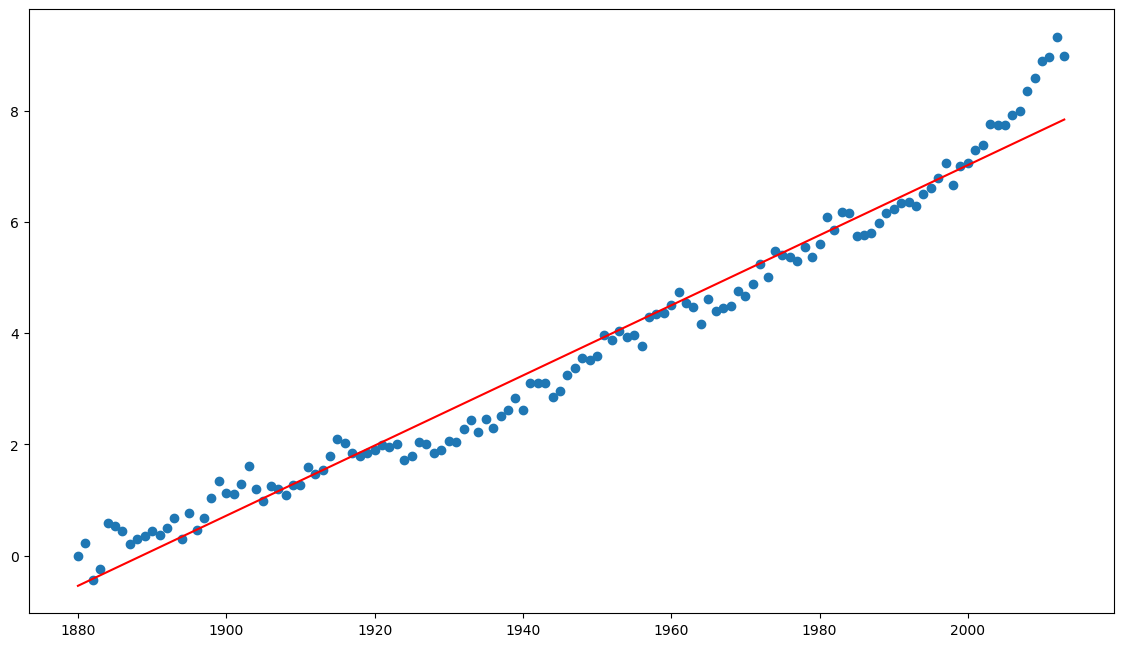

In [12]:
fig, ax = plt.subplots(figsize=(14, 8), dpi=100)
plt.scatter(x='Year', y='CSIRO Adjusted Sea Level', data=df)
x=df.Year
y=df['CSIRO Adjusted Sea Level']
res = linregress(x = x, y=y)
plt.plot(x, res.intercept + res.slope*x, 'r')

In [13]:
df.Year.tail()

129    2009
130    2010
131    2011
132    2012
133    2013
Name: Year, dtype: int64

In [28]:
year_list = [i for i in range(2013,2051)]
year_list=pd.Series(year_list)
new_year= df.Year.append(year_list).reset_index().drop(["index"], axis=1)


In [29]:
new_year.tail()

,0
167,2046
168,2047
169,2048
170,2049
171,2050


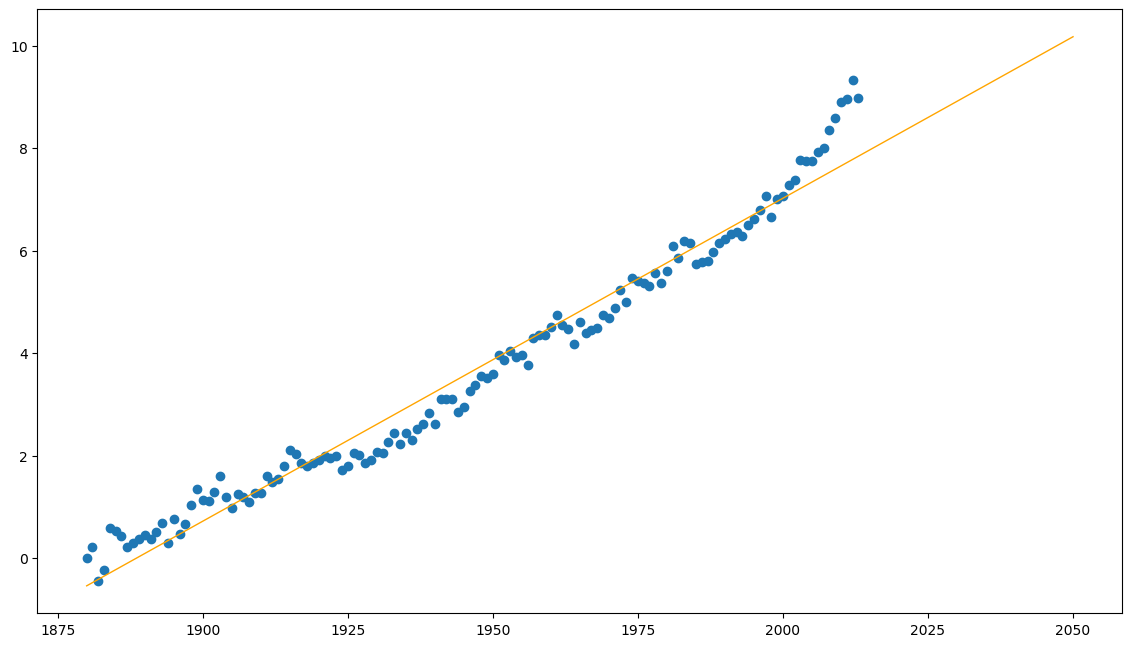

In [39]:
fig, ax = plt.subplots(figsize=(14, 8), dpi=100)

#Prepare data for prediction

year_list = [i for i in range(2013,2051)]
year_list=pd.Series(year_list)
new_year= df.Year.append(year_list).reset_index().drop(["index"], axis=1)

#Draw scatter plot
plt.scatter(x='Year', y='CSIRO Adjusted Sea Level', data=df)
x=df.Year
y=df['CSIRO Adjusted Sea Level']

#Draw regression line
slope, intercept, r_value, p_value, std_err = linregress(x = x, y=y)
line = [slope*xi + intercept for xi in new_year.values]
plt.plot(new_year.values, line, color = 'orange', label="Fitting Line", linewidth=1)

Text(0.5, 1.0, 'Rise in Sea Level')

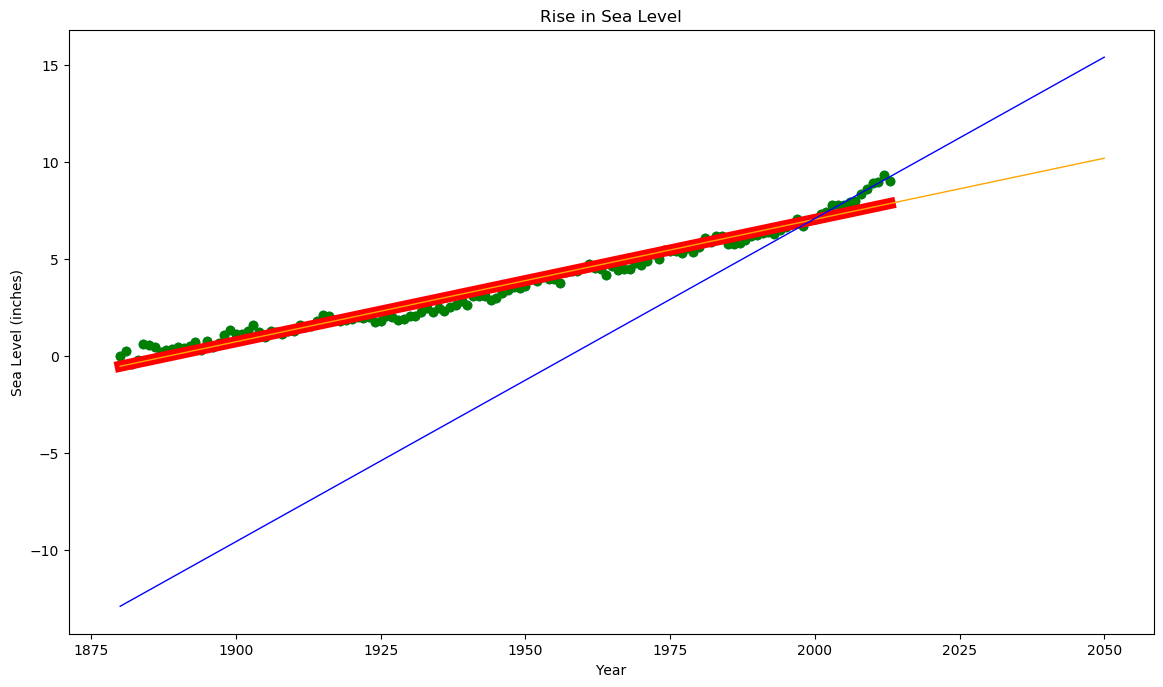

In [59]:
fig, ax = plt.subplots(figsize=(14, 8), dpi=100)
plt.scatter(x='Year', y='CSIRO Adjusted Sea Level', data=df)
x=df.Year
y=df['CSIRO Adjusted Sea Level']
res = linregress(x = x, y=y)
plt.plot(x, res.intercept + res.slope*x, 'r', linewidth=8)

#Prepare data for prediction

year_list = [i for i in range(2013,2051)]
year_list=pd.Series(year_list)
new_year= df.Year.append(year_list).reset_index().drop(["index"], axis=1)

#Draw scatter plot
plt.scatter(x='Year', y='CSIRO Adjusted Sea Level', data=df, color='g')
x=df.Year
y=df['CSIRO Adjusted Sea Level']

#Draw regression line
slope, intercept, r_value, p_value, std_err = linregress(x = x, y=y)
line = [slope*xi + intercept for xi in new_year.values]
plt.plot(new_year.values, line, color = 'orange', label="Fitting Line", linewidth=1)

#Prep data for new regr line
df_2000=df.loc[df.Year >=2000]
x_2000=df_2000.Year
y_2000=df_2000['CSIRO Adjusted Sea Level']


# Adjusted regression from year 2000
slope, intercept, r_value, p_value, std_err = linregress(x = x_2000, y=y_2000)
line_2000 = [slope*xi + intercept for xi in new_year.values]

plt.plot(new_year.values, line_2000, color = 'blue', label="adjusted regr", linewidth=1)

plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sea Level');

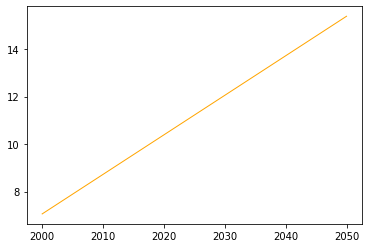

In [70]:
#Prepare data for prediction

year_list = [i for i in range(2014,2051)]
year_list=pd.Series(year_list)
new_year= df.Year.append(year_list).reset_index().drop(["index"], axis=1)


df_2000=df.loc[df.Year >=2000]
x_2000=df_2000.Year
y_2000=df_2000['CSIRO Adjusted Sea Level']
# Adjusted regression from year 2000
slope, intercept, r_value, p_value, std_err = linregress(x = x_2000, y=y_2000)
line_2000 = [slope*xi + intercept for xi in new_year.iloc[120:].values]

plt.plot(new_year.iloc[120:].values, line_2000, color = 'orange', label="adjusted regr", linewidth=1)

In [66]:
new_year.shape

(171, 1)